In [43]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [44]:
cdata=pd.read_csv("Company_Data.csv")
cdata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [45]:
label_encoder=preprocessing.LabelEncoder()
cdata["ShelveLoc"]=label_encoder.fit_transform(cdata["ShelveLoc"])
cdata["Urban"]=label_encoder.fit_transform(cdata["Urban"])
cdata["US"]=label_encoder.fit_transform(cdata["US"])
cdata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [79]:
max=cdata["Sales"].max()
max

16.27

In [80]:
min=cdata["Sales"].min()
min

0.0

In [81]:
labels=["low","high"]
bins=[0.0,8.0,17.0]
cdata['Sales']=pd.cut(cdata["Sales"],bins=bins,labels=labels)


In [83]:
cdata['Sales']=label_encoder.fit_transform(cdata['Sales'])
cdata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [84]:
x=cdata.iloc[:,1:11]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [85]:
y=cdata["Sales"]
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int64

In [86]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=40) 
x_train, x_test,y_train,y_test

(     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
 85         125     103            0         304    112          2   49   
 69         127      59            0         339     99          2   65   
 203        131      82            0         132    157          0   25   
 379        125     111            0         404    107          0   54   
 261        121      42            4         188    118          2   54   
 ..         ...     ...          ...         ...    ...        ...  ...   
 306        131      32            1          85    133          2   48   
 165        147      58            7         100    191          0   27   
 7          136      81           15         425    120          1   67   
 219        116      79           19         359    116          1   58   
 326        133      30            0         152    122          2   53   
 
      Education  Urban  US  
 85          13      0   0  
 69          12      1   0  
 203       

In [87]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
dtypes: int32(3), int64(8)
memory usage: 29.8 KB


In [90]:
#entropy criteria
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion="entropy",max_depth=4)
model1.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(140.616, 195.696, 'X[5] <= 0.5\nentropy = 1.013\nsamples = 320\nvalue = [137, 182, 1]'),
 Text(53.568000000000005, 152.208, 'X[4] <= 93.0\nentropy = 0.655\nsamples = 83\nvalue = [14, 69, 0]'),
 Text(26.784000000000002, 108.72, 'X[1] <= 57.0\nentropy = 0.989\nsamples = 16\nvalue = [9, 7, 0]'),
 Text(13.392000000000001, 65.232, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(40.176, 65.232, 'X[1] <= 115.0\nentropy = 0.684\nsamples = 11\nvalue = [9, 2, 0]'),
 Text(26.784000000000002, 21.744, 'entropy = 0.469\nsamples = 10\nvalue = [9, 1, 0]'),
 Text(53.568000000000005, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(80.352, 108.72, 'X[1] <= 70.5\nentropy = 0.383\nsamples = 67\nvalue = [5, 62, 0]'),
 Text(66.96000000000001, 65.232, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(93.74400000000001, 65.232, 'X[2] <= 15.5\nentropy = 0.592\nsamples = 35\nvalue = [5, 30, 0]'),
 Text(80.352, 21.744, 'entropy = 0.439\nsamples = 33\nvalue = [3, 30, 0]'),
 Te

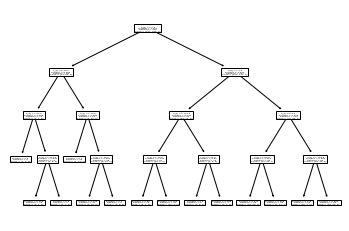

In [91]:
tree.plot_tree(model1)

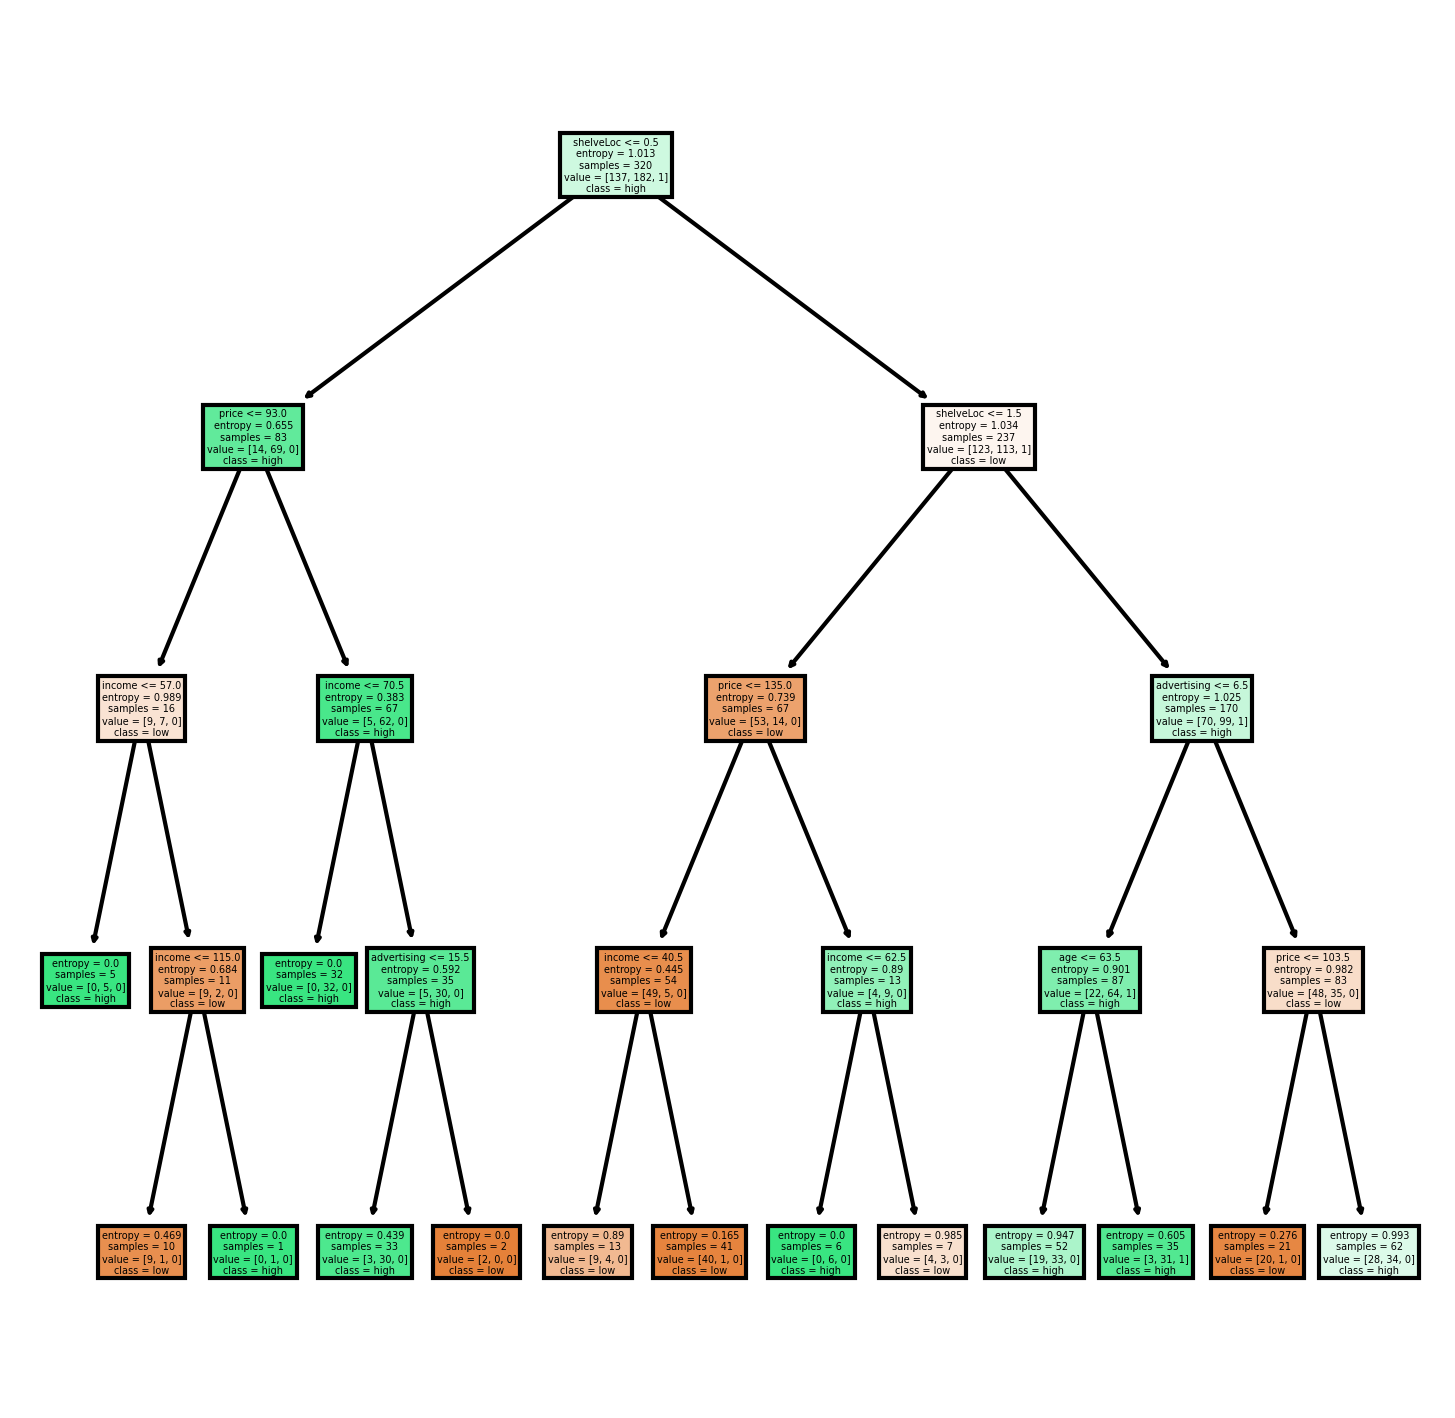

In [93]:
fn=["Compprice","income","advertising","population","price","shelveLoc","age","education","urban","us"]
cn=['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [94]:
model1.score(x_test,y_test) 

0.7625

In [54]:
pred=model1.predict(x_test)
pred

array([ 6.85875   ,  7.90711111,  5.97818182,  8.65333333,  6.73125   ,
        6.13542373, 11.05064516,  8.65333333,  6.13542373, 11.97      ,
        6.85875   ,  6.13542373,  7.90711111,  8.19857143, 11.05064516,
        4.63846154,  7.90711111,  6.73125   ,  6.13542373,  6.13542373,
        6.73125   ,  8.65333333,  6.13542373, 11.05064516,  7.90711111,
        6.13542373, 11.05064516,  5.9005    , 11.05064516, 11.05064516,
       11.97      ,  8.575     , 11.97      ,  7.90711111,  8.19      ,
        8.65333333,  6.85875   ,  5.9005    ,  7.90711111,  6.13542373,
        5.97818182,  5.9005    ,  6.13542373,  8.65333333,  6.73125   ,
        8.19857143,  4.63846154,  6.13542373,  6.13542373,  6.13542373,
        6.13542373,  6.13542373, 10.30142857,  8.65333333,  2.05      ,
       11.97      ,  6.73125   ,  8.65333333,  6.78      ,  4.63846154,
        6.13542373,  7.90711111,  8.65333333,  6.13542373,  4.63846154,
        8.575     , 11.05064516,  6.13542373,  4.63846154, 11.97

In [55]:
#classification problem

In [56]:
fcheck=pd.read_csv("Fraud_check.csv")
fcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [57]:
fcheck["Undergrad"]=label_encoder.fit_transform(fcheck["Undergrad"])
fcheck["Marital.Status"]=label_encoder.fit_transform(fcheck["Marital.Status"])
fcheck["Urban"]=label_encoder.fit_transform(fcheck["Urban"])
fcheck


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [58]:
col=fcheck["Taxable.Income"]
max_value=col.max()
max_value
###klkk
min_value=col.min()
min_value

10003

In [59]:
labels=["risky","good"]
bins=[10003,50000,100000]
fcheck['Taxable.Income']=pd.cut(fcheck["Taxable.Income"],bins=bins,labels=labels)


In [65]:
fcheck['Taxable.Income']=label_encoder.fit_transform(fcheck["Taxable.Income"])
fcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,1,154058,0,1
598,1,1,0,180083,17,0


In [66]:
a=fcheck.iloc[:,[0,1,3,4,5]]
a

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [67]:
b=fcheck["Taxable.Income"]
b

0      0
1      1
2      1
3      0
4      0
      ..
595    0
596    0
597    1
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

In [68]:
a_train, a_test,b_train,b_test = train_test_split(a,b, test_size=0.2,random_state=40) 
a_train, a_test,b_train,b_test

(     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
 332          1               0            84132                1      0
 13           0               1            86649               16      1
 274          1               1           112584               25      0
 257          1               1            31611               17      1
 112          1               2           193038               26      1
 ..         ...             ...              ...              ...    ...
 440          0               2           170407               13      1
 165          1               1            38463               23      1
 7            1               2           131253                3      1
 219          1               0            26814                9      0
 326          1               0           165001               19      1
 
 [480 rows x 5 columns],
      Undergrad  Marital.Status  City.Population  Work.Experience  Urban
 159          1         

In [74]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=4)
model.fit(a_train,b_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

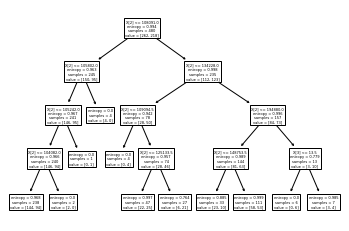

In [75]:
tree.plot_tree(model);


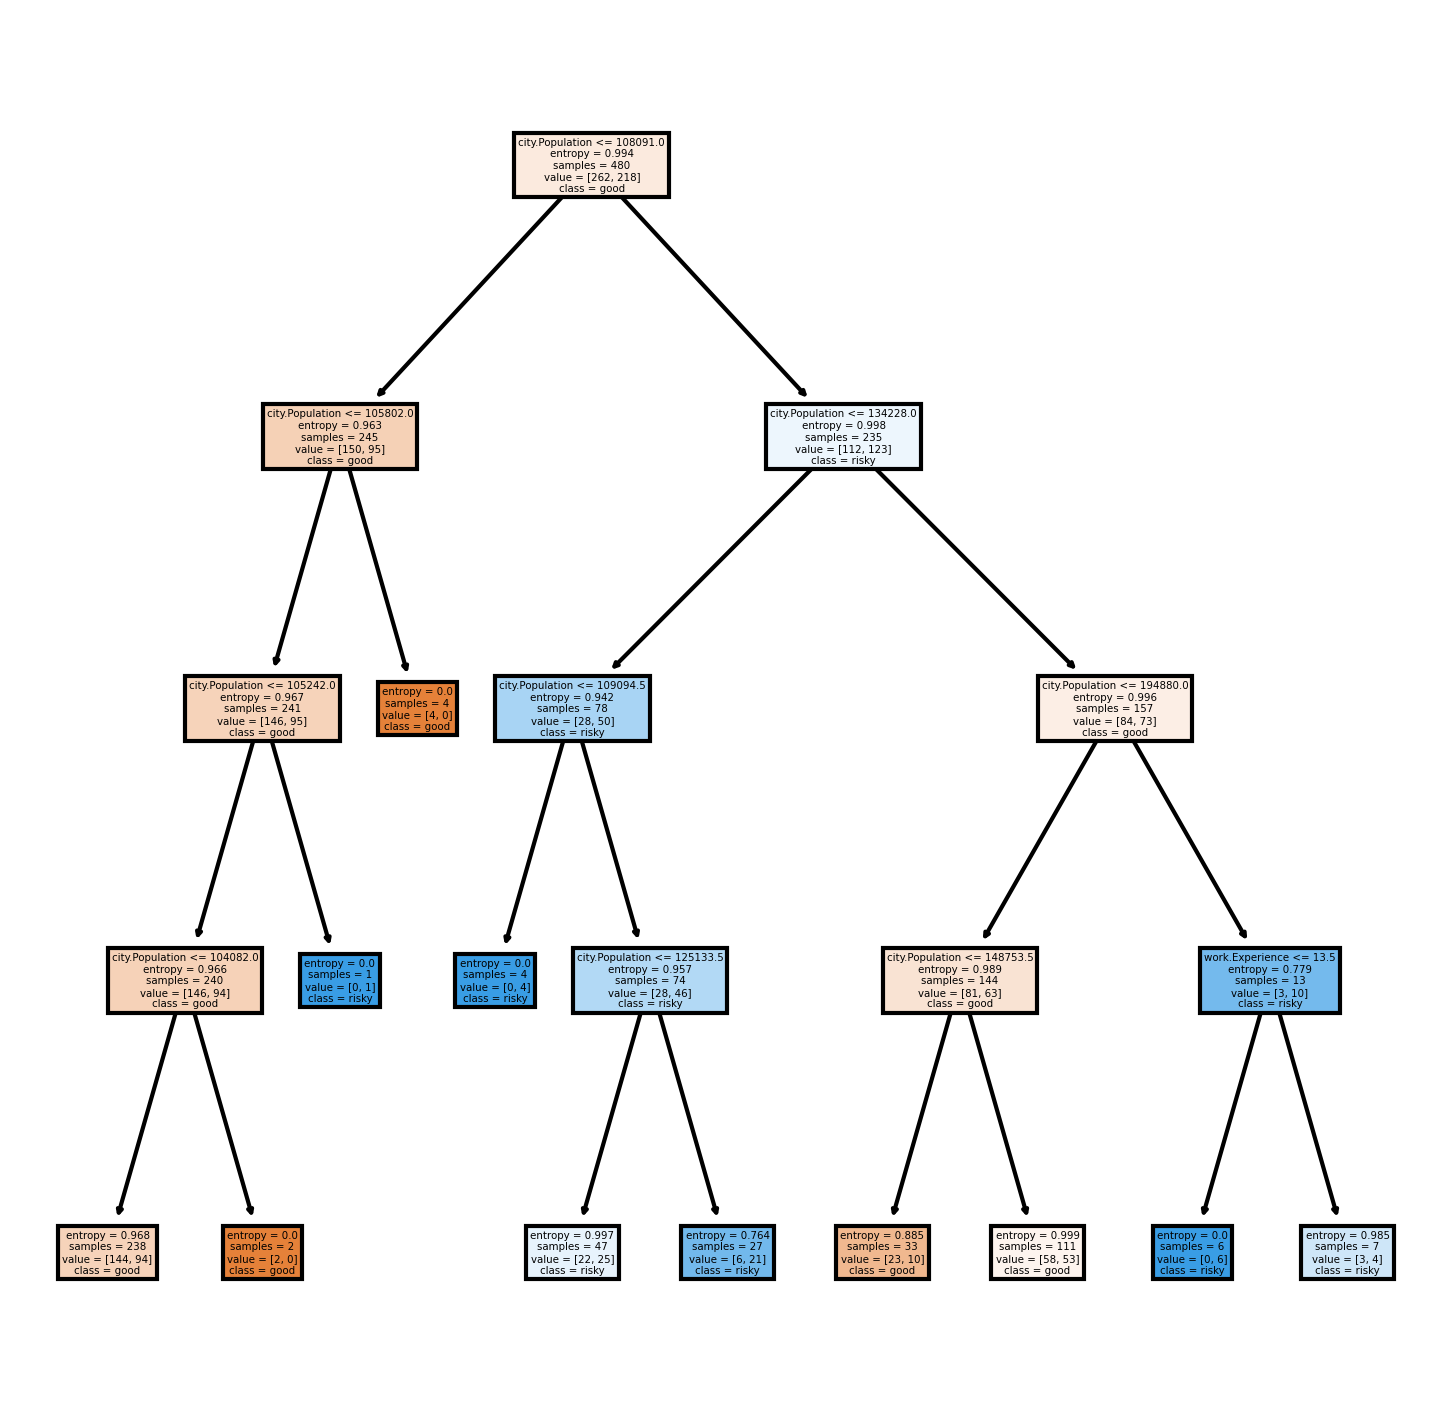

In [76]:
fn=['undergrad','marital.Status','city.Population','work.Experience','urban']
cn=['good','risky','aa']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [95]:
model.score(a_test,b_test)

0.6083333333333333